In [4]:
!pip3 install lxml

In [5]:
import requests
from lxml import html
from IPython.display import Image, display

# 총장님의 프로필 사진과 약력 가져오기

[링크](https://www.korea.ac.kr/mbshome/mbs/university/subview.do?id=university_010202000000) 여기서 총장님의 프로필과 약력을 알 수 있어요.

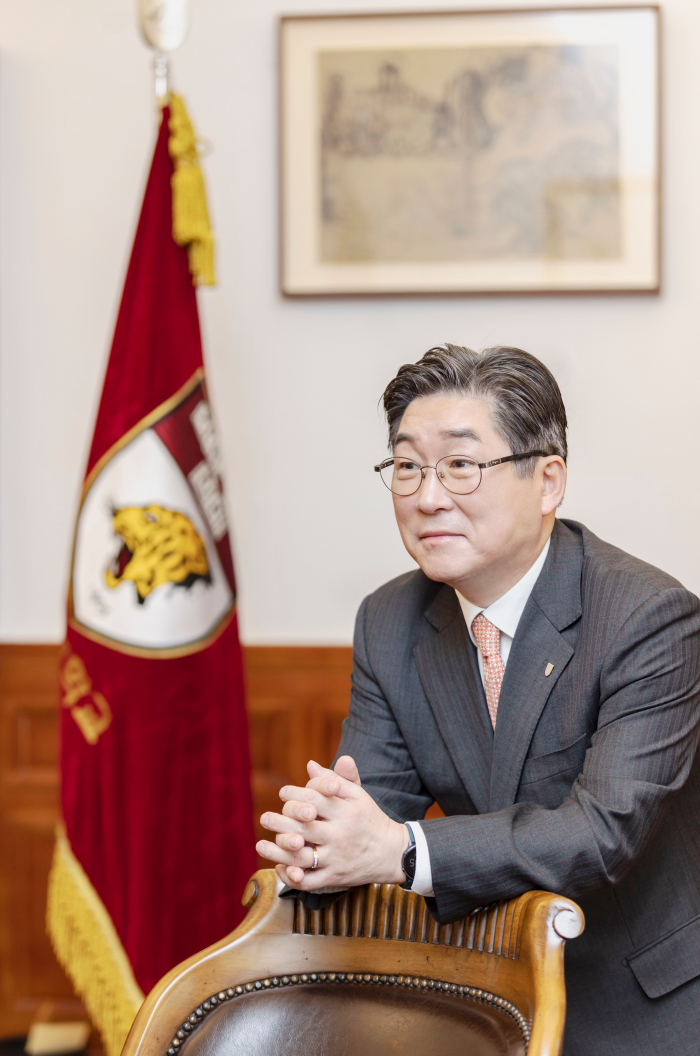

In [6]:
president_img_url = 'https://www.korea.ac.kr/dext5editordata/2023/04/20230404_091647948_72075.jpg'
president_img = requests.get(president_img_url).content
display(Image(president_img))

## 총장님 프사 저장하기

In [7]:
with open('profile_image.jpg','wb') as f:
    f.write(president_img)

## 이번에는 약력을 가져와 보자
 - 개발자 도구를 열어서 아래 크롤링한 페이지와 비교해 봐요.

In [8]:
response = requests.get('https://www.korea.ac.kr/mbshome/mbs/university/subview.do?id=university_010202000000')
president_resume = html.fromstring(response.text)
president_resume

<Element html at 0x10e0f4b90>

## 우선 개발자 도구에서 내가 가져오기를 원하는 요소를 Elements 탭에서 선택하여 xpath를 복사해 온다.
<img src='../resources/xpath.gif' alt='president' width='2000'/>

## 약간의 xpath 문법을 알아야 합니다.
### 기본 구조
 - 노드 선택: XPath는 다양한 종류의 노드를 선택할 수 있습니다(예: 요소, 속성, 텍스트 등).
 - 경로 표현: / (루트 노드로부터의 절대 경로), // (문서 내 어느 위치에서나 시작하는 상대 경로) 등을 사용합니다.

### 주요 표현

 - `/`: 루트 노드에서 시작하는 절대 경로를 나타냅니다.
 - `//`: 현재 노드 위치와 관계없이 지정된 노드를 찾습니다.
 - `@`: 속성을 나타냅니다.
 - `*`: 모든 요소를 선택합니다.
 - `[n]`: n번째 요소를 선택합니다 (1부터 시작).


In [9]:
president_resume_text = president_resume.xpath('//*[@id="contents_body"]/div[2]/div[1]/dl//text()')

- **`//*`**: 문서 내의 모든 요소를 선택합니다.
- **`[@id="contents_body"]`**: **`id`** 속성이 **`contents_body`**인 요소를 찾습니다.
- **`/div[2]`**: 선택된 요소의 두 번째 **`div`** 자식을 선택합니다.
- **`/div[1]`**: 그 **`div`** 의 첫 번째 **`div`** 자식을 선택합니다.
- **`/dl`**: 이 **`div`** 의 모든 **`dl`** (정의 목록) 자식 요소를 선택합니다.
- **`//text()`**: 선택된 **`dl`** 요소들 내의 모든 텍스트 노드를 선택합니다.

내용이 더 궁금하면 다음 링크를 참조하세요.(30분이면 xpath 문법을 익힐 수 있어요.)

링크: https://www.w3schools.com/xml/xpath_intro.asp

### 총장님 약력을 파일로 저장하기

In [10]:
president_resume_text = [text.strip("\n ") for text in  president_resume_text ]
president_resume_text = [text for text in  president_resume_text if text !='']
president_resume_text = "\n".join(president_resume_text)

In [11]:
with open('president_resume.txt', 'w') as f:
    f.write(president_resume_text)

## 내가 좋아하는 웹툰을 파일로 저장해보자.

### 이미지 파일들 주소 가져오기: GET 방식이 쓰였음을 기억하기

In [12]:
webtoon_url = 'https://comic.naver.com/webtoon/detail?titleId=478261&no=87&week=thu'
webtoon_page = requests.get(webtoon_url).text
image_list = html.fromstring(webtoon_page).xpath('/html/body/div[1]/div[3]/div[1]//img/@src')
image_list

['https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a14481edb1dfc6be6ffa585_IMAG01_1.jpg',
 'https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a14481edb1dfc6be6ffa585_IMAG01_2.jpg',
 'https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a14481edb1dfc6be6ffa585_IMAG01_3.jpg',
 'https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a14481edb1dfc6be6ffa585_IMAG01_4.jpg',
 'https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a14481edb1dfc6be6ffa585_IMAG01_5.jpg',
 'https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a14481edb1dfc6be6ffa585_IMAG01_6.jpg',
 'https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a14481edb1dfc6be6ffa585_IMAG01_7.jpg',
 'https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a14481edb1dfc6be6ffa585_IMAG01_8.jpg',
 'https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a144

In [13]:
for img_url in image_list:
    response = requests.get(img_url)
    print(response)
    break

<Response [403]>


## Response가 4로 시작하면, 실패했다는 뜻입니다. 특히 403 에러는 서버에서 접근을 금지시켜 놓은 것입니다.
 - 네이버에서 Yeti만을 크롤링을 허락했다는 사실을 기억해 내세요.
 - 링크: https://searchadvisor.naver.com/guide/seo-basic-firewall

In [14]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebit/53.7.36 (KHTML, like Gecko) Chrome/63.0.3239.0 Safari/537.36 (compatible; Yeti/1.1; +https://naver.me/spd)',
}
for idx, img_url in enumerate(image_list):
    response = requests.get(img_url, headers=headers)
    with open(str(idx)+'.jpg','wb') as f:
        f.write(response.content)

## 쿠팡 장바구니에 물건 마구마구 담기
 - 쿠팡에 먼저 로그인 해 두세요.
 - 다음 라면 구매 링크로 이동하세요. 링크: https://www.coupang.com/vp/products/7958974?itemId=93553&vendorItemId=3000207618&q=%EC%8B%A0%EB%9D%BC%EB%A9%B4&itemsCount=36&searchId=d0a0c8fb34964c0f939e8de0aa2a3d05&rank=0&isAddedCart=

<img src='../resources/ramen.gif' alt='president' width='2000'/>

다음 사이트에 이동해서 방금 복사한 내용을 붙여 넣으세요.
 - 링크: https://curlconverter.com/python/

<img src='../resources/curl.gif' alt='president' width='2000'/>


In [15]:
# 방금 복사한 내용을 여기 붙여 넣고 실행하세요. 3번 정도 실행해 보고 쿠팡 내 장바구니에 가보세요.

### POST 방식이 쓰였음을 꼭 기억하세요.

In [22]:
import requests
cookies = {
    'NNB': '56XSELRHLOCGG',
    'm_loc': 'f0c4f5626ea66aec0014742cd47853981a7f50174c73883cce4c760296fff453',
    'NV_WETR_LOCATION_RGN_M': '"MDkyOTA2MDA="',
    'NV_WETR_LAST_ACCESS_RGN_M': '"MDkyOTA2MDA="',
    'NID_AUT': 'eqzYQF6iwjYfjE4Gi7rl1bZvjgA3UwFEnqQ0ilW5750aZ3jnbmADWjwNndp7NOlG',
    'NID_JKL': '7fmDC+cRrLoZoxKMkRUVFAfwNu7Io3AoaiiDfh3ojnw=',
    'NID_SES': 'AAABiJYsP7jSzeHUKk0H2oJb79EUmhaj8OAdkjs8IjrDFfUU/8N3Hb2kidaWnuy5E5Dyd+MqkzkiWCwl/SSTLqCifAFkINC1IgulMMH27wUiKQBjJyLwDvOmHHGlS+EwGRuXhr49eE61Gv9u+nQqto1RHTsVq4tKIBneesP9U+IFRBmuDWa499K/W/JAAcgT6Bo7xlb/wEOCTh7F3KXAqC9xNwn530xFeec1ukvQ3iUh91Y0W3AHcsdmxI5rzRKw9wMm4zR8pvItp2OSZXp55f58n9e6U5DeGRvYHHDK227MawVdMkyPSgLAgWJGHIrO8CA9avW/ZxRLSaL3hK1y/prQzHMyj3pgeQYlO1GVwus+u2o0gRW8rOjhnAYhzVQn1O5Og/ere5vBI4Sa1C2LzM4IuOt+QKDsY7H9sACIxYMtEVRQtMm58+aWrsj45INwoI5FrRugSgOHWefMzlXN7x0mfLNWyzwY+QDdY471w9kxtMpQAk9C9Uqfz/h1QDeSMS1NiOm2RFZNGGz4JAD3IFbI5kY=',
}

headers = {
    'authority': 'apis.naver.com',
    'accept': 'application/json, text/plain, */*',
    'accept-language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
    # 'cookie': 'NNB=56XSELRHLOCGG; m_loc=f0c4f5626ea66aec0014742cd47853981a7f50174c73883cce4c760296fff453; NV_WETR_LOCATION_RGN_M="MDkyOTA2MDA="; NV_WETR_LAST_ACCESS_RGN_M="MDkyOTA2MDA="; NID_AUT=eqzYQF6iwjYfjE4Gi7rl1bZvjgA3UwFEnqQ0ilW5750aZ3jnbmADWjwNndp7NOlG; NID_JKL=7fmDC+cRrLoZoxKMkRUVFAfwNu7Io3AoaiiDfh3ojnw=; NID_SES=AAABkQFE95o7pxIddHIaaFPr5Mw9XzrRgCO8FuE1HD/yA0gdtUllvQ1YF//25MLSoynsrgmhWyAhWyo4jjP/vAq+tH5owa1LjNe14g1sNDWxd5IpbmSxrPcdj0NO/65ZDJD70ErDmko17dPJUAC3PEfjX/H+lUXswUpvRDrYCSElMXWELgA8A+qOInV1ExG8oMMZFtHgmJhqKdJv47L9cHI8AksZM7EYUXJlT3P9pAfgXbuSkNFUurQMW5QSkpiPRAIJa7DKletcoT257rtYGWyJnAcTnLNXa+4WScI5Dm0D6pK0mkhxEF9MfE61XuDIbpR60RLn87pGr5/yOiAiIg/xe/N2HP1fn7fnsy2miGSjCc7Qs9onbKAPg0dAhcsIdkym/O5uMHdVsoDUTrFAZTB6fNS1Fig5aFiEv+oEu80ssBFCCYS5sOAeDALQCeEdADs55lEC81Yz9xFQWibvV1sRk3Cei6inT80bFjENXhquG5mp3tiuPdILgZ07Nr1iTVw9NCDxJwD6SzXIqeJXKMATgMQr1msc4i/k5fvROAHnMWxb',
    'origin': 'https://cafe.naver.com',
    'referer': 'https://cafe.naver.com/ca-fe/cafes/28743386/articles/880?referrerAllArticles=true&oldPath=%2FArticleRead.nhn%3FreferrerAllArticles%3Dtrue%26clubid%3D28743386%26articleid%3D880',
    'sec-ch-ua': '"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";v="24"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
    'x-cafe-product': 'pc',
}

params = {
    'requestFrom': 'A',
    'orderBy': 'asc',
}


response = requests.get(
    'https://apis.naver.com/cafe-web/cafe-articleapi/v2/cafes/28743386/articles/880/comments/pages/1',
    params=params,
    cookies=cookies,
    headers=headers,
)

In [23]:
comments = response.json()['result']['comments']['items']

In [25]:
for comment in comments:
    print(comment['writer']['nick'], comment['content'])

한규호 참
정가람 참
김선응 불
정진우 참
이지성 불
양시원 참
김원중 참
김원중 불로 변경
진창환 참
21 김태현 참
윤병롱 불
23 이호승 참
신현식 참
정찬 불
김휘윤 참
황성현 참
김태산 참
22조영민 참
최종원 참
23 이상우 불
이준수 불
안준서 불
김성헌 참
황태균 불
23김재준 불
문시완 불
이은서 불
김우진 참
황성준 참
황호연 참
목진권 참
김성표 불
장호석 불
김경수 불
19 지유강 참
윤인수 참
박주영 불
박재현 불
김현우 불
이민우 불
김은재 불
김웅재 참
송제윤 불
강병수 불
김창현 일단 불인데 참하려고 노력해봄
신현규 참 가능??
변근호 참
강현우 불
조민근 참


In [1]:
!pip3 install pandas
!pip3 install xlsxwriter
!pip3 install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [2]:
# import pandas
import pandas as pd

# create file
writer = pd.ExcelWriter('kubiz.xlsx', engine='xlsxwriter')

# close file
writer.close()

In [1]:
# import pandas
import pandas as pd

# dataframe with Name and Age columns
df = pd.DataFrame({'Name': ['A', 'B', 'C', 'D'], '참/불': [10, 0, 30, 50]})

# create a Pandas Excel writer object using XlsxWriter as the engine
writer = pd.ExcelWriter('kubiz.xlsx', engine='xlsxwriter')

# write data to the excel sheet
df.to_excel(writer, sheet_name='Sheet1', index=False)

# close file
writer.close()